In [2]:
import json
import pprint

import healsparse as hsp
import numpy as np
import matplotlib.pyplot as plt
import skyproj
import hpgeom

In [3]:
hsm = hsp.HealSparseMap.read("y6-combined-hleda-gaiafull-des-stars-hsmap131k-mdet-v2.hsp")
nhsm = hsp.HealSparseMap.read("y6-combined-hleda-gaiafull-des-stars-hsmap131k-mdet-extra-masks-v2.hsp")
with open("hleda_extra_mask_config_v1.json") as fp:
    msk_config = json.load(fp)

In [7]:
print("total masked area:", (hsm.n_valid - nhsm.n_valid) * hpgeom.nside_to_pixel_area(hsm.nside_sparse))

total masked area: 0.2039139636494084


NGC0055
NGC0253
NGC0300
IC1613


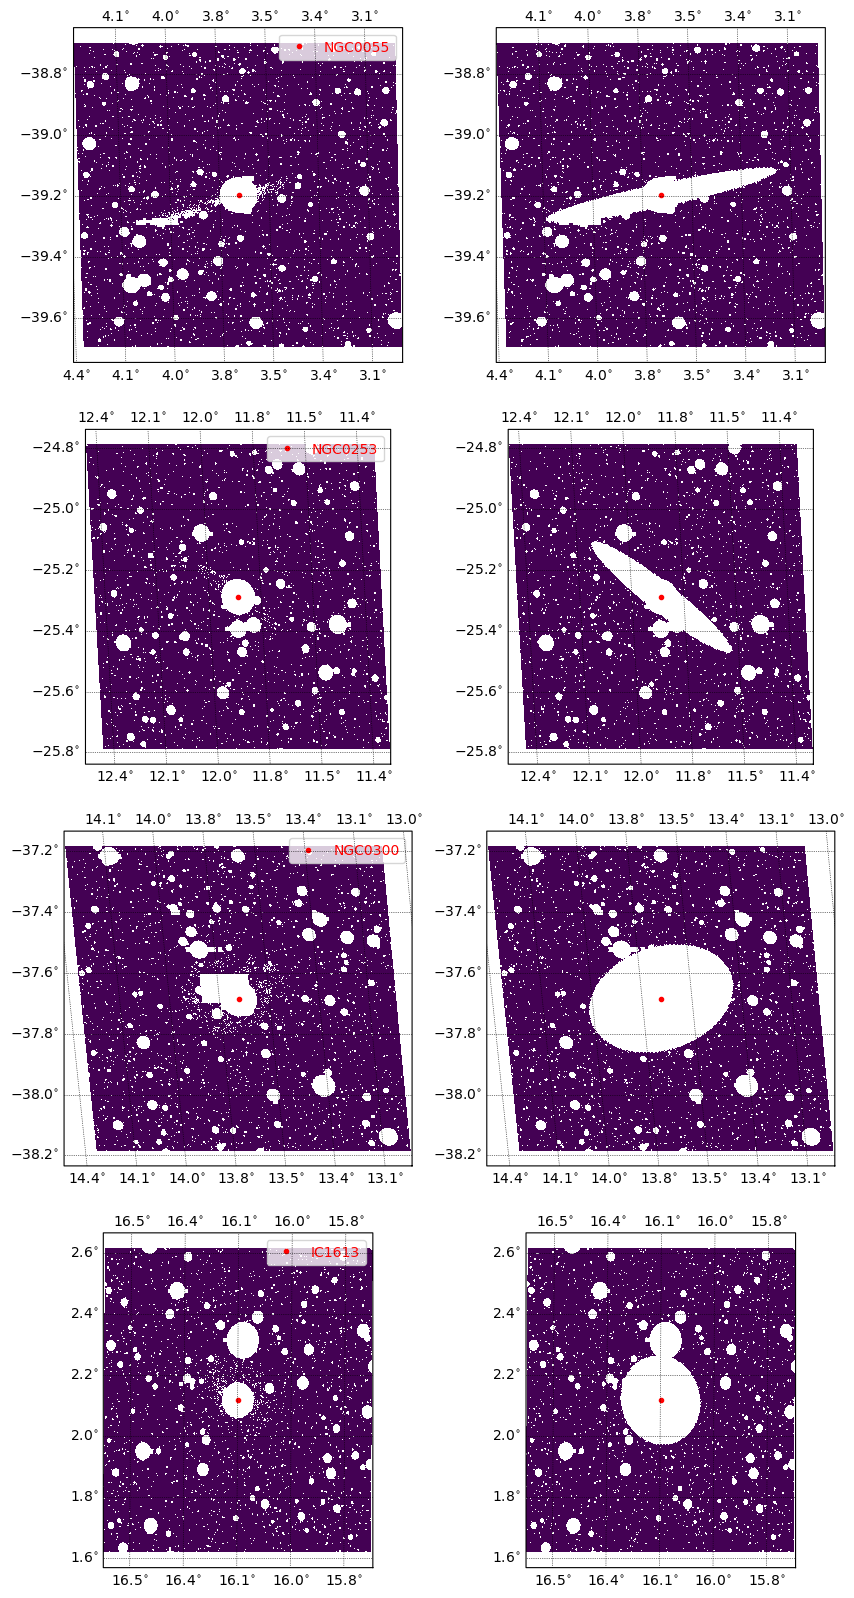

total masked area: 0.2039139636494084


In [5]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 20))

for i, (obj, data) in enumerate(msk_config.items()):
    print(obj)
    data = msk_config[obj]
    ra = data["ra"]
    dec = data["dec"]

    dlat = 1 / 2
    dlon = dlat / np.cos(dec / 180 * np.pi)

    ax = axs[i, 0]
    sp = skyproj.McBrydeSkyproj(ax=ax)
    # Note that the default is to zoom in to the range defined by the map
    _ = sp.draw_hspmap(hsm, lon_range=[ra - dlon, ra + dlon], lat_range=[dec - dlat, dec + dlat], cmap="viridis_r")
    # sp.draw_inset_colorbar()
    sp.ax.plot(ra, dec, "r.", label=obj)
    sp.ax.legend(loc="upper right", labelcolor="red")
    sp.ax.set_xlabel("")
    sp.ax.set_ylabel("")
    
    ax = axs[i, 1]
    sp = skyproj.McBrydeSkyproj(ax=ax)
    # Note that the default is to zoom in to the range defined by the map
    _ = sp.draw_hspmap(nhsm, lon_range=[ra - dlon, ra + dlon], lat_range=[dec - dlat, dec + dlat], cmap="viridis_r")
    # sp.draw_inset_colorbar()
    sp.ax.plot(ra, dec, "r.")
    sp.ax.set_xlabel("")
    sp.ax.set_ylabel("")

plt.show()